In [10]:
import pandas as pd

In [11]:
balancedDataset = pd.read_csv("./full_dataset.tsv" ,sep='\t', index_col=0)
balancedDataset

,topic,relation,argument1,argument2,source_arg_1,source_arg_2
pair_id,,,,,,
1,cuba,no_relation,But what I do suggest is that at least we have...,Too often in these discussions of foreign affa...,Kennedy_October_23_1960,Nixon_October_22_1960
2,cuba,no_relation,What I have advocated is that we use all avail...,They can say we ca n't object to the Soviet Un...,Kennedy_October_23_1960,Nixon_October_22_1960
3,cuba,support,We could have tried to inject ourselves into t...,I do n't take the views that the only alternat...,Nixon_September_12_1960,Kennedy_September_2_1960
4,cuba,support,"And the young men and women , those who are st...","Oh , the problems are great . In Cuba , in the...",Kennedy_September_2_1960,Nixon_August_26_1960
5,cuba,attack,I say in that connection that with all the cri...,Major policy on issues such as Cuban security ...,Nixon_October_6_1960,Kennedy_October_6_1960
...,...,...,...,...,...,...
1903,cuba,no_relation,I do not know how he can seek the Presidency a...,These are the times that you can read and have...,Kennedy_October_15_1960,Nixon_October_14_1960
1904,minimum wage,no_relation,"You have the Kennedy bill , which would raise ...",To pass them by - to water down the help they ...,Nixon_August_13_1960,Kennedy_August_10_1960
1905,minimum wage,no_relation,But these rivers in the New York area are not ...,"I think , as you are aware , you actually have...",Kennedy_September_29_1960,Nixon_August_13_1960


In [12]:
bySubject = balancedDataset.groupby(["topic", "relation"]).count()
bySubject["count"] = bySubject["argument1"]
bySubject = bySubject.drop(columns=["argument1", "argument2", "source_arg_1", "source_arg_2"])
bySubject

count
topic                    relation          
cuba                     attack          38
                         no_relation    302
                         support         40
disarmament              attack          76
                         no_relation    192
                         support        108
medical care,health care attack          75
                         no_relation    235
                         support         72
minimum wage             attack         125
                         no_relation    180
                         support         83
unemployment             attack          64
                         no_relation    264
                         support         53

In [13]:
bySubject

count
topic                    relation          
cuba                     attack          38
                         no_relation    302
                         support         40
disarmament              attack          76
                         no_relation    192
                         support        108
medical care,health care attack          75
                         no_relation    235
                         support         72
minimum wage             attack         125
                         no_relation    180
                         support         83
unemployment             attack          64
                         no_relation    264
                         support         53

(<Axes: xlabel='topic,relation'>,)

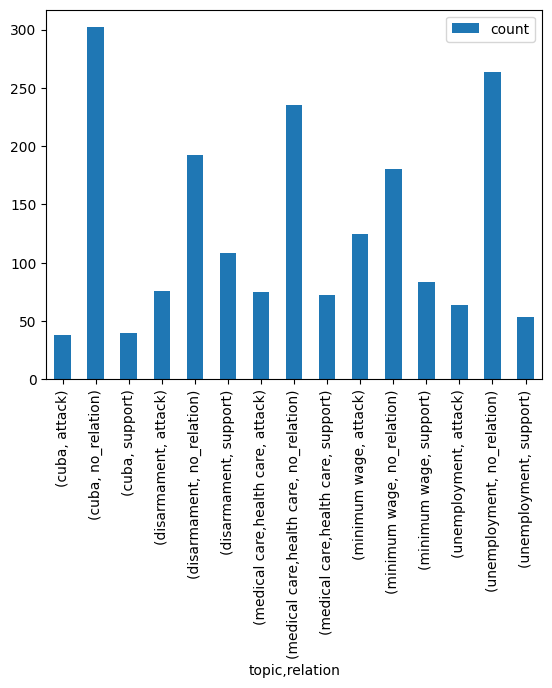

In [14]:
bySubject.plot(kind="bar"),

In [15]:
bySubject = bySubject.reset_index()
bySubject
bySubject.index = bySubject.topic 
bySubject= bySubject.drop(columns="topic")
bySubject


,relation,count
topic,,
cuba,attack,38
cuba,no_relation,302
cuba,support,40
disarmament,attack,76
disarmament,no_relation,192
disarmament,support,108
"medical care,health care",attack,75
"medical care,health care",no_relation,235
"medical care,health care",support,72


In [16]:
bySubject = bySubject.pivot_table('count', ['topic'], 'relation')
bySubject

relation,attack,no_relation,support
topic,,,
cuba,38.0,302.0,40.0
disarmament,76.0,192.0,108.0
"medical care,health care",75.0,235.0,72.0
minimum wage,125.0,180.0,83.0
unemployment,64.0,264.0,53.0


<Axes: xlabel='topic'>

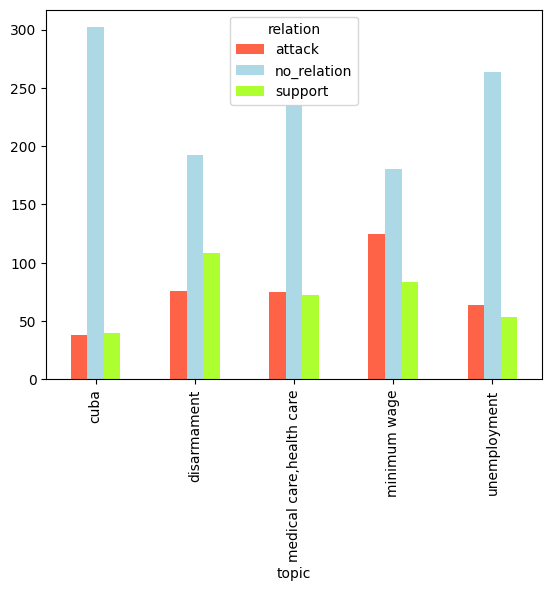

In [17]:
bySubject.plot.bar(color=['tomato','lightblue','greenyellow'])

<Axes: xlabel='topic'>

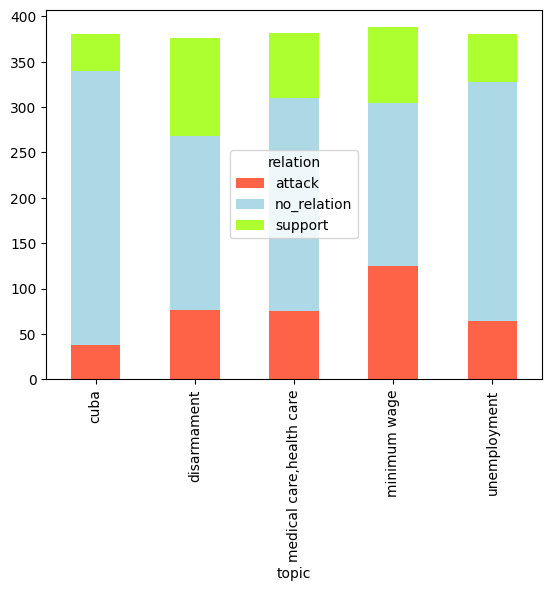

In [19]:
bySubject.plot.bar(color=['tomato','lightblue','greenyellow'], stacked=True)